#**Electric Machine Simulation in Python | Single Coil Reluctance Device**


---


This notebook is intended to be a part of a larger collection of notebooks on electric machine simulation in Python. This collection will begin with simple devices like this single coil reluctance device and increase in complexity up to multi-phase AC machines. These electrodynamics simulations can ultimately be used to quickly test and iterate on controller designs. This notebook is by no means exhaustive; I am writing this mainly to document my own process as I learn more about these machines. 

This particular notebook covers the modeling and simulation of a simple single coil [reluctance device](https://en.wikipedia.org/wiki/Reluctance_motor) adapted from an example used in Heath Hofmann's course on electric machinery and drives at the University of Michigan (EECS 419 | Winter 2023). The example (figure taken directly from Prof. Hofmann's manuscript) follows:

**Single coil reluctance device:**

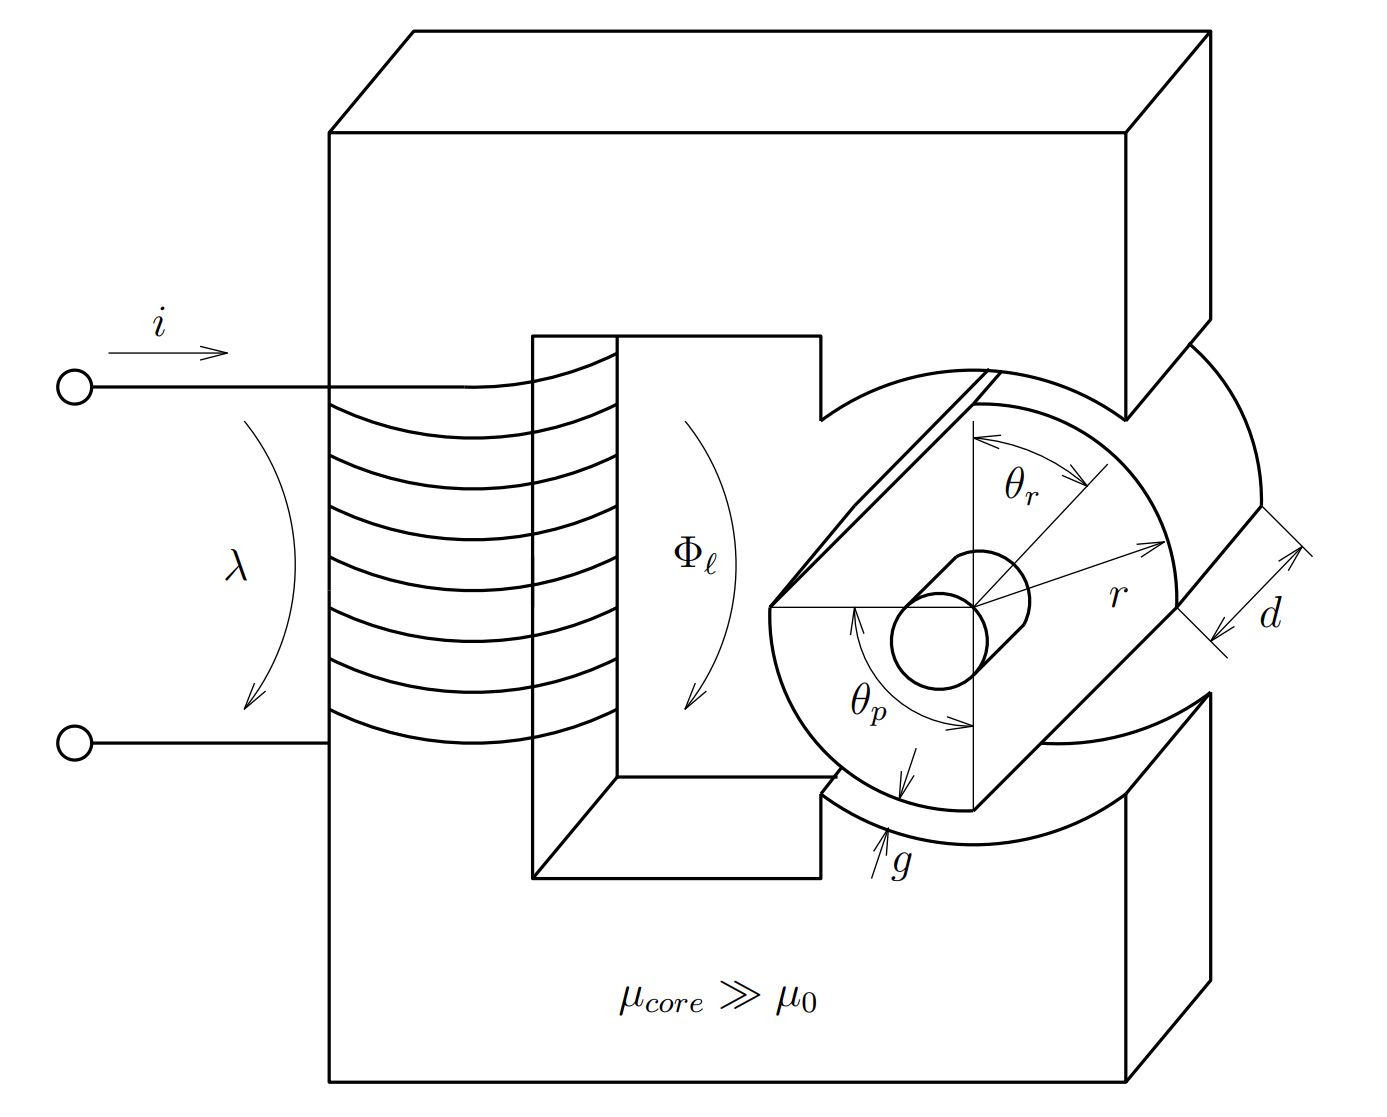

#Simulation Strategy


---


The flux linkage ($\lambda$) - current ($i$) relationship is given for this device:<br><br>

\begin{gather*}
\lambda = [L_c + L_vcos(2\theta_r)]i \tag{1}
\end{gather*}<br>

Here, $L_c = 2mH$ is some "constant" or average inductance and $L_v = 1mH$ is some inductance that varies with rotor angle, $\theta_r$. The coil also has some resistance $R = 2m\Omega$.<br><br>

In this device, both the rotor and stator are constructed from soft magnetic materials (i.e. there are no permanent magnets). Control of the motion of the rotor is accomplished by controlling the current $i$, which in turn is accomplished by varying the voltage $v$ across the coil. In practice, this voltage would be generated by some combination of computer and power electronic circuitry, but to keep things simple in this notebook I just wanted to model the electrodynamics of the device itself. Thus, I'll arbitrarily take $v(t) = 5cos(40t)$. Similarly, the simplicity of this example makes it such that achieving any kind of continuous rotation would be difficult in real life. Again, since the purpose of this notebook is simulating accurate electrodynamics, we will just arbitrarily define some constant angular rate from $\theta(t) = 40t$.<br><br>

To describe the electrodynamics of this device, we need a modified form of Faraday's law in addition to our flux linkage/current relationship described in (1):<br><br>

\begin{gather*}
v = Ri + \frac{d\lambda}{dt} \tag{2}
\end{gather*}<br>

Substituting (1) into (2), we find our electrodynamics can be defined as:<br><br>

\begin{gather*}
v = Ri + \frac{d}{dt}[[L_c + L_vcos(2\theta_r)]i]\\
= Ri + L_c\frac{di}{dt} + L_vcos(2\theta_r) - 80L_vsin(2\theta_r) \tag{3}
\end{gather*}<br>

Now we need to pause and consider some practicalities in order to determine what information we want to get out of this equation. $v$ in this case is a given, and will always be treated as a given input from the perspective of the electric machine, because we are often directly influencing $v$ via the aforementioned computer and power electronics. $R$ and $L$ are inherent parameters of the electric machine. Thus, we are interested in solving for $i$ as the "output" of this electrodynamic system, so we need to rearrange (3) to form:<br><br>

\begin{gather*}
\frac{di}{dt} = \frac{1}{L_c + L_vcos(2\theta_r)}[v - Ri +80L_vsin(2\theta_r)i] \tag{4}
\end{gather*}<br>

$i$ can be directly determined by integrating (4), taking initial current in the device $i_0 = 0$. I opted to use the [Euler method](https://en.wikipedia.org/wiki/Euler_method) as my numerical integrator for this simulation due to its simple implementation.<br><br>

On to the Python script. I used numpy and matplotlib for math and plotting functionality, and then initialized the device parameters:



In [79]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

## Device Parameters
L_c = 2e-3 # Average (constant) coil inductance term (H)
L_v = 1e-3 # Varying coil inductance term (H)
r = 2e-3 #Coil resistance
i = 0 # Initial current

Next, the simulation parameters. I specified some end time for the simulation and some Euler integration time step. I found that `dt = 0.0001` was as small a step I could take before feeling fidgety during the time it took to run the simulation.


In [80]:
## Simulation Parameters
dt = 0.0001 # Euler integration time step
t_end = 1 # Time at which to stop simulating
time = np.arange(0,t_end,dt) # Time discretization

Some initialization of simulation counters and data storage variables; I'm not sure if this is necessary to be honest, I'm definitely an engineer before a computer scientist. This worked fine and ran pretty fast, so in it stays:

In [81]:
## Simulation Setup
simlength = time.size 
simstep = 0
dlambda_dt_store = np.array([])
i_store = np.array([])
torque_store = np.array([])

And a little affirmation to boost confidence that the code is actually running:

In [82]:
## Simulation Affirmation 
print("\n Simulation Begun \n \n -> PATIENCE IS A VIRTUE <- \n")


 Simulation Begun 
 
 -> PATIENCE IS A VIRTUE <- 



Now for the cool part. The simulation loop itself is just a `while` condition that advances through the elements of the time discretization array and computes $v$ and $\theta_r$ before then computing the inductance terms and $\frac{d\lambda}{dt}$. I chose to calculate those terms separately before plugging into $\frac{di}{dt}$ (from equation 4) simply because I thought it would look too cluttered to have everything in one line, and thus be harder to debug syntactical errors in the math. Then I implemented the Euler method to integrate $\frac{di}{dt}$, thus obtaining $i$ for the next time step. I then stored $i$ values at every calculation for graphing, advanced the simulation counter, and that's the simulation!

In [83]:
## Simulation Loop
while simstep < simlength:
    # Advance Simulation Time
    t = time[simstep]

    # Inputs/Controller
    v = 5*np.cos(40*t) # Voltage as function of time
    theta = 40*t # Rotor velocity as a function of time

    # Physics
    inductance = (L_c + L_v * np.cos(2*theta)) # Given flux/current relationship
    dLambda_dt = (v - (r*i))
    di_dt = (1/inductance) * (dLambda_dt + (80*L_v*np.sin(2*theta)*i))

    # Euler Method 
    i = i + (di_dt * dt);

    # Store for plot
    i_store = np.append(i_store,i)
    
    # Advance Simulation Step
    simstep = simstep + 1

Now, a well deserved affirmation and some plots:


 Simulation Complete ;) 



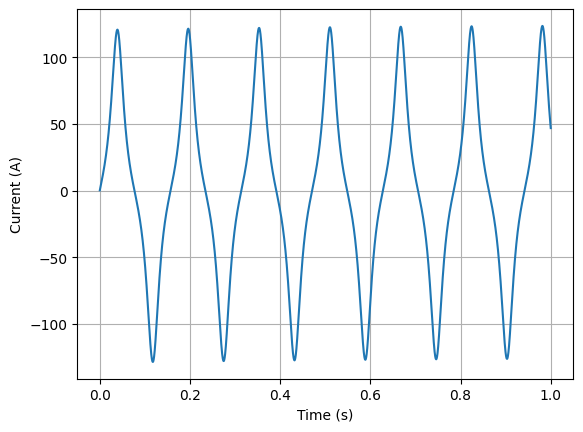

In [96]:
## Simulation Affirmation
print("\n Simulation Complete ;) \n")

## Plots
#plt.figure(figsize = (1.6, 1.2), dpi = 400)
plt.plot(time, i_store)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.show()